<a href="https://colab.research.google.com/github/tomdaler/repository/blob/main/ML%20Projects/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Wine Quality


In [323]:
#data = h2o.upload_file('winequality-red.csv')
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [241]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [266]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [324]:
df['quality']= df['quality']-3


In [325]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scaled_features = df.copy()

col_names = ['fixed acidity','free sulfur dioxide','total sulfur dioxide','alcohol','pH','residual sugar']
features = scaled_features[col_names]
df_new = scale.fit_transform(features)

scaled_features[col_names] = df_new

In [326]:
scaled_features

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360             0.700         0.00       -0.453218      0.076   
1         -0.298547             0.880         0.00        0.043416      0.098   
2         -0.298547             0.760         0.04       -0.169427      0.092   
3          1.654856             0.280         0.56       -0.453218      0.075   
4         -0.528360             0.700         0.00       -0.453218      0.076   
...             ...               ...          ...             ...        ...   
1594      -1.217796             0.600         0.08       -0.382271      0.090   
1595      -1.390155             0.550         0.10       -0.240375      0.062   
1596      -1.160343             0.510         0.13       -0.169427      0.076   
1597      -1.390155             0.645         0.12       -0.382271      0.075   
1598      -1.332702             0.310         0.47        0.752894      0.067   

      free sulfur dioxide  total sulfur dioxide  density        pH  sulphates  \
0               -0.466193             -0.379133  0.99780  1.288643       0.56   
1                0.872638              0.624363  0.99680 -0.719933       0.68   
2               -0.083669              0.229047  0.99700 -0.331177       0.65   
3                0.107592              0.411500  0.99800 -0.979104       0.58   
4               -0.466193             -0.379133  0.99780  1.288643       0.56   
...                   ...                   ...      ...       ...        ...   
1594             1.542054             -0.075043  0.99490  0.899886       0.58   
1595             2.211469              0.137820  0.99512  1.353436       0.76   
1596             1.255161             -0.196679  0.99574  0.705508       0.75   
1597             1.542054             -0.075043  0.99547  1.677400       0.71   
1598             0.203223             -0.135861  0.99549  0.511130       0.66   

       alcohol  quality  
0    -0.960246        2  
1    -0.584777        2  
2    -0.584777        2  
3    -0.584777        3  
4    -0.960246        2  
...        ...      ...  
1594  0.072294        2  
1595  0.729364        3  
1596  0.541630        3  
1597 -0.209308        2  
1598  0.541630        3  

[1599 rows x 12 columns]

In [327]:
X = scaled_features.drop(['quality'],axis=1)
y = scaled_features['quality']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

Visualize for correlations or random

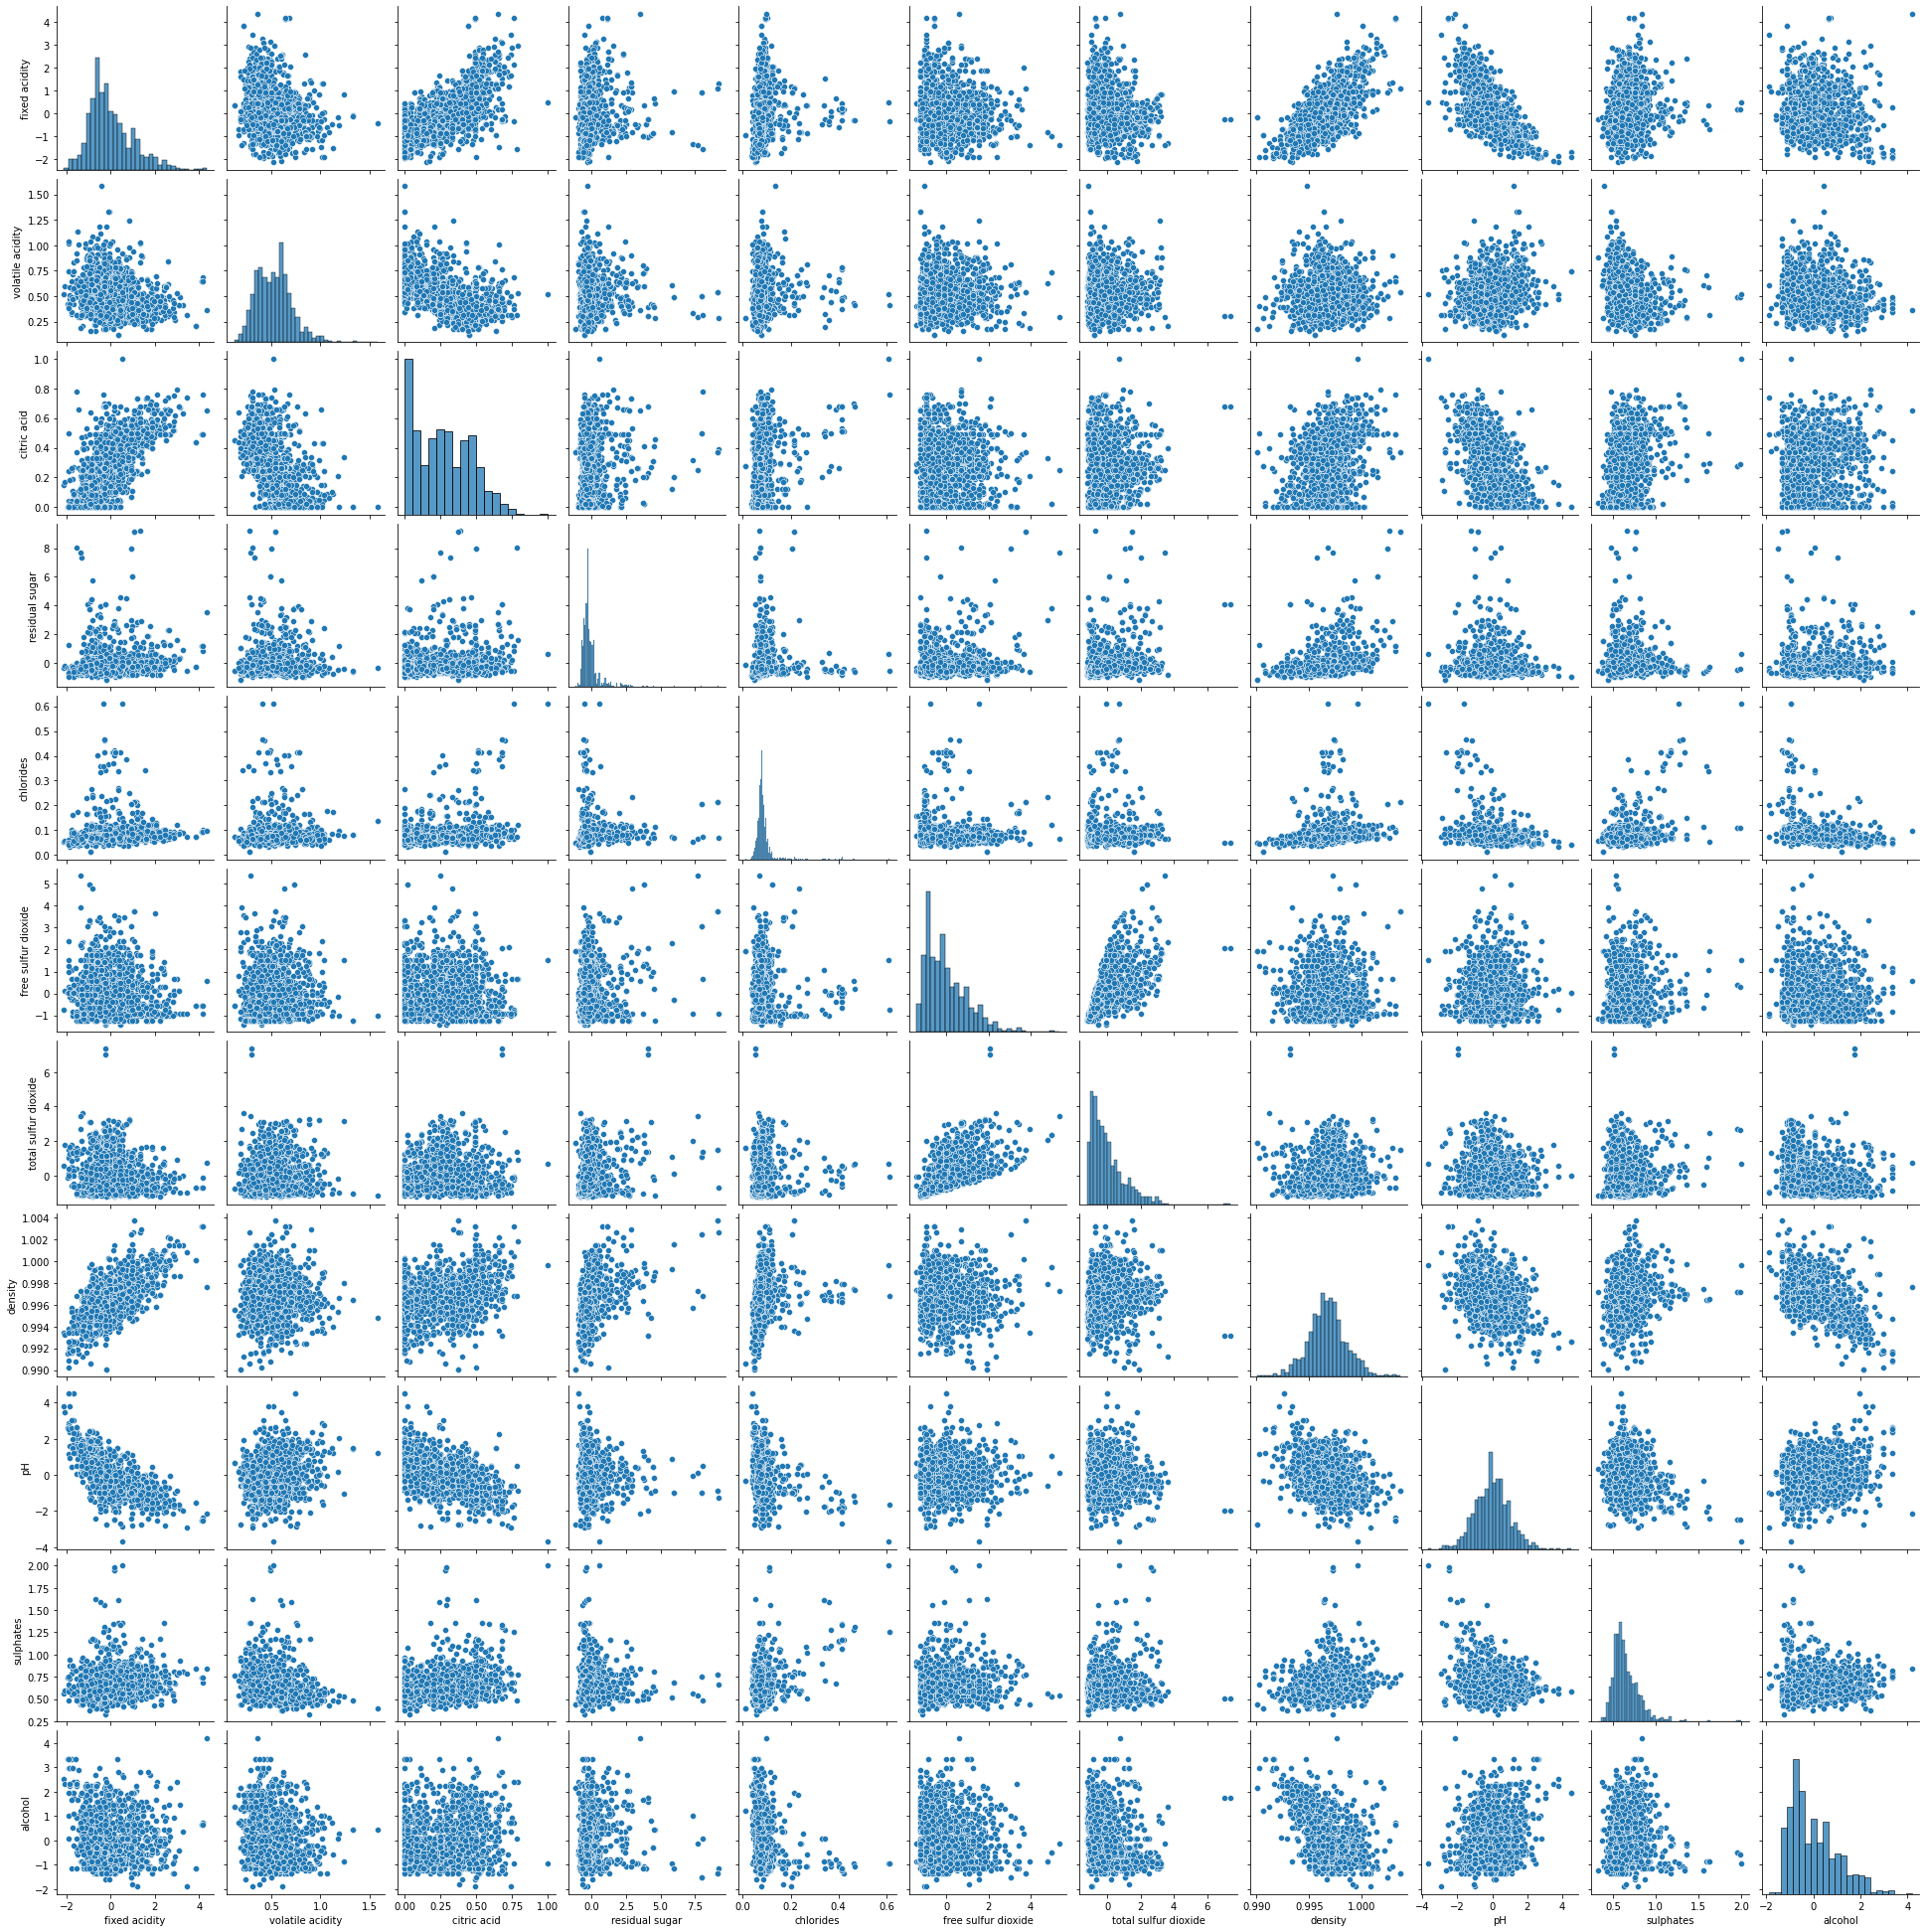

In [328]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.pairplot(X)

PCA

In [329]:
from sklearn.decomposition import PCA
pca =PCA(n_components=11)
pca.fit(X)
pca.explained_variance_ratio_

array([3.02032018e-01, 2.88610783e-01, 1.73447282e-01, 1.24215521e-01,
       5.60203250e-02, 4.35915954e-02, 6.35988925e-03, 3.79721382e-03,
       1.68533816e-03, 2.39941742e-04, 9.19773465e-08])

In [330]:
X=X.drop(['alcohol', 'sulphates','pH','density'], axis=1)

In [317]:
from sklearn.decomposition import PCA
pca =PCA(n_components=9)
pca.fit(X)
pca.explained_variance_ratio_

array([3.62844013e-01, 3.31841157e-01, 1.71383141e-01, 7.15118354e-02,
       5.24611249e-02, 7.52961442e-03, 2.07085165e-03, 3.58003331e-04,
       2.58600450e-07])

In [331]:
X=X.drop(['total sulfur dioxide'], axis=1)
from sklearn.decomposition import PCA
pca =PCA(n_components=6)
pca.fit(X)
pca.explained_variance_ratio_

array([0.3891562 , 0.36660101, 0.22731986, 0.01260243, 0.00368141,
       0.00063909])

These fields are not important
- alcohol
- solphates
- pH
- density
- total sulfur dioxide

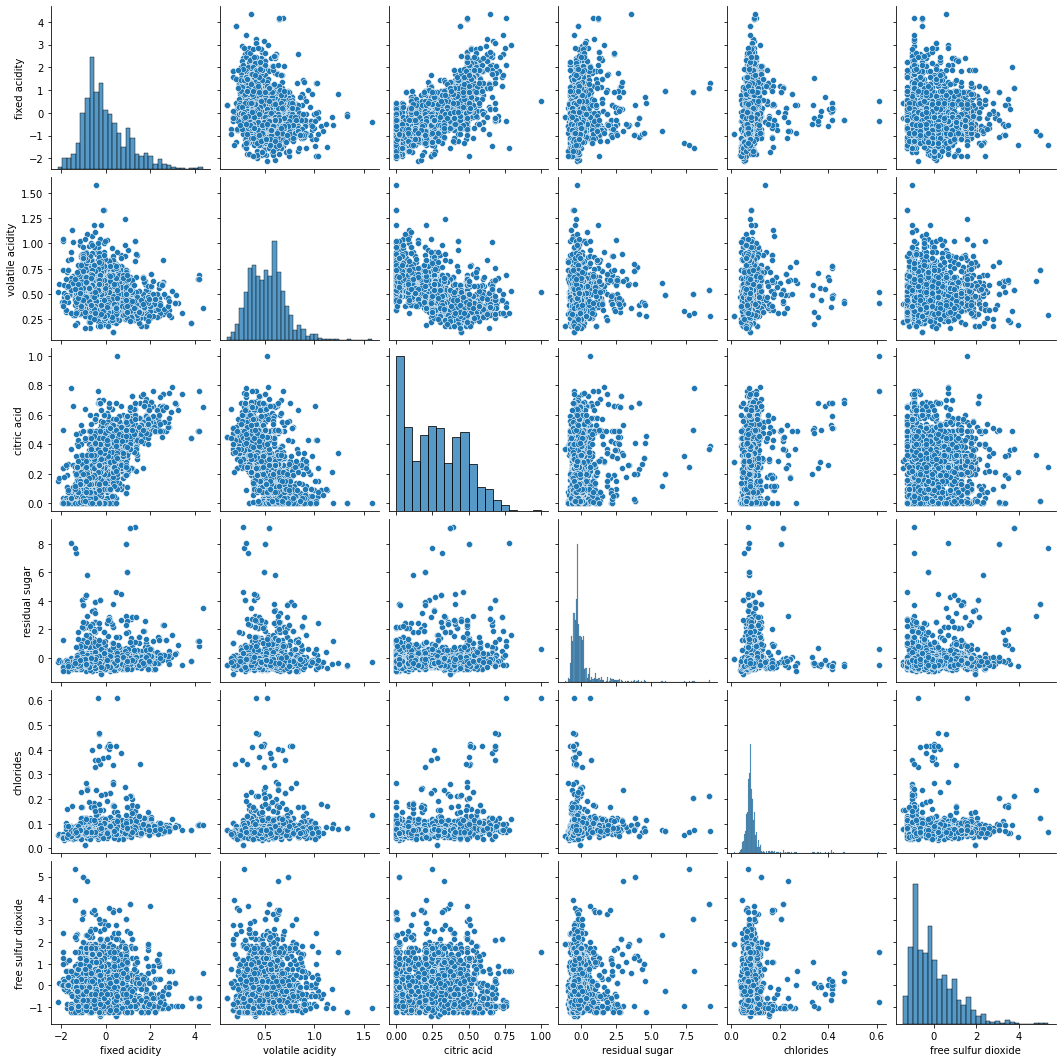

In [332]:
sns.pairplot(X)

First with a DecisionTreeRegressor and cross validation


In [333]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import (
   cross_val_score, KFold
)

model = DecisionTreeRegressor()
score = cross_val_score(model, train_X, train_y, cv=5, scoring='neg_mean_squared_error')
print ("MSE para cv=5, 5 valores")
print(score)

MSE para cv=5, 5 valores
[-0.63839286 -0.67857143 -0.70089286 -0.625      -0.55605381]


Train using Bagging


In [334]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(train_X, train_y)
bag_model.oob_score_

0.6827524575513851

Using RandomForestClassifier


In [335]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), train_X, train_y, cv=5)
scores.mean()


0.6505725496476618

Bagging for Several Models


In [336]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import accuracy_score

#Eliminar warnings
import warnings
warnings.simplefilter("ignore")

classifier = {
        'KNeighbors': KNeighborsClassifier(),
        'LinearSCV': LinearSVC(),
        'SVC': SVC(),
        'SGDC': SGDClassifier(),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier(),
        'LogisticRegression': LogisticRegression(),
        'svm': SVC(decision_function_shape='ovo')
    }

for name, estimator in classifier.items():
    bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=5).fit(train_X, train_y)
    bag_pred = bag_class.predict(test_X)
    print('Accuracy Bagging with {}:'.format(name), accuracy_score(bag_pred, test_y))
    print('')


Accuracy Bagging with KNeighbors: 0.5895833333333333

Accuracy Bagging with LinearSCV: 0.5479166666666667

Accuracy Bagging with SVC: 0.5708333333333333

Accuracy Bagging with SGDC: 0.5229166666666667

Accuracy Bagging with DecisionTree: 0.6145833333333334

Accuracy Bagging with RandomForestClassifier: 0.6520833333333333

Accuracy Bagging with LogisticRegression: 0.56875

Accuracy Bagging with svm: 0.5541666666666667



RandomForestRegression has more accuracy, 0.65. But previously, when assigning hyper parameters the accuracy was 10% higer. Explore hyper parameters


In [337]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100,120, 140],
            'max_samples': [0.7,0.9] 
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,10,20]
        }
    }
}

scores = []

from sklearn.model_selection import GridSearchCV

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                                best_params
0                  svm    0.494683              {'C': 20, 'kernel': 'linear'}
1        random_forest    0.479060  {'max_samples': 0.7, 'n_estimators': 100}
2  logistic_regression    0.490917                                  {'C': 20}

Using Baggging, cross_val

In [338]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.7, 
    oob_score=True,
    random_state=0
)
bag_model.fit(train_X, train_y)
bag_model.oob_score_

0.6791778373547811

In [340]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(), 
    n_estimators=100, 
    max_samples=0.7, 
    oob_score=True,
    random_state=0
)
bag_model.fit(train_X, train_y)
bag_model.oob_score_

0.6818588025022342

The process was faster after transofming the variable with scaler

Using Bayesian Optimizer

In [ ]:
!pip install h2o
!pip install bayesian-optimization

In [341]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from bayes_opt import BayesianOptimization
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         3 hours 50 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.4
H2O_cluster_version_age:    8 days
H2O_cluster_name:           H2O_from_python_unknownUser_7ml7f4
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.895 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide'],
      dtype='object')

In [354]:
data = h2o.upload_file('winequality-red.csv')
train_cols = [x for x in data.col_names if x not in ['quality']]
target = "quality"
train, test = data.split_frame(ratios=[0.7])


#train, test = df.split_frame(ratios=[0.7])

def train_model(max_depth, 
                ntrees,
                min_rows, 
                learn_rate, 
                sample_rate, 
                col_sample_rate):
    params = {
        'max_depth': int(max_depth),
        'ntrees': int(ntrees),
        'min_rows': int(min_rows),
        'learn_rate':learn_rate,
        'sample_rate':sample_rate,
        'col_sample_rate':col_sample_rate
    }
    model = H2OGradientBoostingEstimator(nfolds=5,**params)
    model.train(x=train_cols, y=target, training_frame=train)
    return -model.rmse()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [349]:
bounds = {
    'max_depth':(5,10),
    'ntrees': (100,200),
    'min_rows':(10,30),
    'learn_rate':(0.001, 0.01),
    'sample_rate':(0.5,0.8),
    'col_sample_rate':(0.5,0.8)
}

In [355]:
optimizer = BayesianOptimization(
    f=train_model,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   | col_sa... | learn_... | max_depth | min_rows  |  ntrees   | sample... |
-------------------------------------------------------------------------------------------------
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
|  1        | -0.625    |  0.6251   |  0.007483 |  5.001    |  16.05    |  114.7    |  0.5277   |
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
|  2        | -0.6537   |  0.5559   |  0.00411  |  6.984    |  20.78    |  141.9    |  0.7056   |
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
|  3        | -0.5935   |  0.5613   |  0.008903 |  5.137    |  23.41    |  141.7    |  0.6676   |
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
|  4        | -0.7009   |  0.5421   |  0.002783 |  9.004    |  29.37    |  131.3    |  0.7077   |
gbm Model Build progress: |█████

In [356]:
optimizer.max

{'params': {'col_sample_rate': 0.7671344314874786,
  'learn_rate': 0.009785959643160268,
  'max_depth': 7.251777220993257,
  'min_rows': 17.765367664771894,
  'ntrees': 194.94105772340743,
  'sample_rate': 0.6746206311896739},
 'target': -0.5138806146228974}

In [365]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [366]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [373]:
rf_random.fit(train_X, train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [374]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}  



In [375]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, 
                               min_samples_leaf= 1, max_features = 'sqrt', max_depth= 10, bootstrap=False)


randmf.fit( train_X, train_y)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt')

In [376]:
randmf.score(test_X, test_y)

0.42164405145586836